In [3]:
import pandas as pd 
import json
import matplotlib.pyplot as plt 
import numpy as np 

In [4]:
with open('rnb_lyr_results/one_rnb_results.json') as json_data:
    one = json.load(json_data)
with open('rnb_lyr_results/two_rnb_results.json') as json_data:
    two = json.load(json_data)
with open('rnb_lyr_results/three_rnb_results.json') as json_data:
    three = json.load(json_data)
with open('rnb_lyr_results/four_rnb_results.json') as json_data:
    four = json.load(json_data)
with open('rnb_lyr_results/five_rnb_results.json') as json_data:
    five = json.load(json_data)
with open('rnb_lyr_results/six_rnb_results.json') as json_data:
    six = json.load(json_data)
with open('rnb_lyr_results/seven_rnb_results.json') as json_data:
    seven = json.load(json_data)

In [5]:
one_personality = pd.DataFrame(one["personality"])
one_personality

,category,children,name,percentile,raw_score,significant,trait_id
0,personality,"[{'trait_id': 'facet_adventurousness', 'name':...",Openness,0.502400,0.748844,True,big5_openness
1,personality,"[{'trait_id': 'facet_achievement_striving', 'n...",Conscientiousness,0.576829,0.637089,True,big5_conscientiousness
2,personality,"[{'trait_id': 'facet_activity_level', 'name': ...",Extraversion,0.957934,0.628080,True,big5_extraversion
3,personality,"[{'trait_id': 'facet_altruism', 'name': 'Altru...",Agreeableness,0.961148,0.812332,True,big5_agreeableness
4,personality,"[{'trait_id': 'facet_anger', 'name': 'Fiery', ...",Emotional range,0.280858,0.434654,True,big5_neuroticism


In [6]:
two_personality = pd.DataFrame(two["personality"])
three_personality = pd.DataFrame(three["personality"])
four_personality = pd.DataFrame(four["personality"])
five_personality = pd.DataFrame(five["personality"])
six_personality = pd.DataFrame(six["personality"])
seven_personality = pd.DataFrame(seven["personality"])

In [7]:
df1 = one_personality[["name","percentile"]]
df2 = two_personality[["name","percentile"]]
df3 = three_personality[["name","percentile"]]
df4 = four_personality[["name","percentile"]]
df5 = five_personality[["name","percentile"]]
df6 = six_personality[["name","percentile"]]
df7 = seven_personality[["name","percentile"]]

In [8]:
combined_scores_df = df1.merge(df2,on='name').merge(df3,on='name').merge(df4,on='name').merge(df5,on='name').merge(df6,on='name').merge(df7,on='name')

In [9]:
combined_scores_df

,name,percentile_x,percentile_y,percentile_x,percentile_y,percentile_x,percentile_y,percentile
0,Openness,0.502400,0.705364,0.667356,0.585534,0.566207,0.547564,0.725562
1,Conscientiousness,0.576829,0.262092,0.842846,0.835676,0.830472,0.966282,0.923045
2,Extraversion,0.957934,0.794612,0.950728,0.792220,0.423322,0.785493,0.918409
3,Agreeableness,0.961148,0.820839,0.983257,0.996583,0.979679,0.981196,0.978000
4,Emotional range,0.280858,0.489672,0.511659,0.288901,0.208682,0.447228,0.831901


In [10]:
values = combined_scores_df.drop('name', axis=1)
values

,percentile_x,percentile_y,percentile_x,percentile_y,percentile_x,percentile_y,percentile
0,0.502400,0.705364,0.667356,0.585534,0.566207,0.547564,0.725562
1,0.576829,0.262092,0.842846,0.835676,0.830472,0.966282,0.923045
2,0.957934,0.794612,0.950728,0.792220,0.423322,0.785493,0.918409
3,0.961148,0.820839,0.983257,0.996583,0.979679,0.981196,0.978000
4,0.280858,0.489672,0.511659,0.288901,0.208682,0.447228,0.831901


In [11]:
timepoint = [1947,1957,1967,1987,1997,2007,2017]
length = np.arange(0,len(values),1)
labels = ["Openness",
          "Consienctiousness",
          "Extraversion",
          "Aggreeableness",
          "Emotional range"]

percentile=[]

for row in values.iterrows():
    index, data = row
    percentile.append(data.tolist())


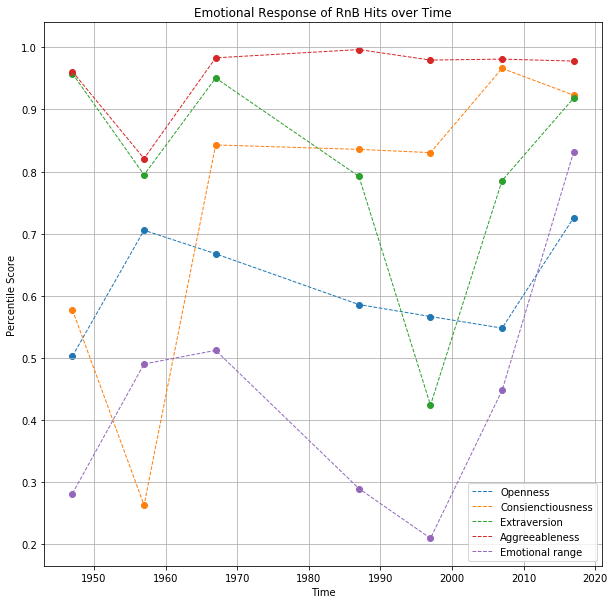

In [12]:
plt.figure(figsize=(10,10))
[plt.scatter(timepoint, percentile[x]) for x in length]
plt.legend(loc='upper left', shadow=True)
[plt.plot(timepoint, percentile[x], linestyle= 'dashed', linewidth=1, label = labels[x]) for x in length]
plt.title("Emotional Response of RnB Hits over Time")
plt.xlabel("Time")
plt.ylabel("Percentile Score")
plt.legend(loc='best')
plt.grid()
plt.show()

<h1><strong> In depth analysis complete data retrieval </strong></h1>


In [13]:
one_depth = [[i["children"][j]["name"], i["children"][j]["percentile"]] for j in range(6) for i in one["personality"] ]
one_full = pd.DataFrame(one_depth)
one_full.columns= [["Emotion", "1957"]]

In [14]:
two_depth = [[i["children"][j]["name"], i["children"][j]["percentile"]] for j in range(6) for i in two["personality"]]
two_full = pd.DataFrame(two_depth)
two_full.columns= [["Emotion", "1967"]]
three_depth = [[i["children"][j]["name"], i["children"][j]["percentile"]] for j in range(6) for i in three["personality"] ]
three_full = pd.DataFrame(three_depth)
three_full.columns= [["Emotion", "1977"]]
four_depth = [[i["children"][j]["name"], i["children"][j]["percentile"]] for j in range(6) for i in four["personality"] ]
four_full = pd.DataFrame(four_depth)
four_full.columns= [["Emotion", "1987"]]
five_depth = [[i["children"][j]["name"], i["children"][j]["percentile"]] for j in range(6) for i in five["personality"] ]
five_full = pd.DataFrame(five_depth)
five_full.columns= [["Emotion", "1997"]]
six_depth = [[i["children"][j]["name"], i["children"][j]["percentile"]] for j in range(6) for i in six["personality"] ]
six_full = pd.DataFrame(six_depth)
six_full.columns= [["Emotion", "2007"]]
seven_depth = [[i["children"][j]["name"], i["children"][j]["percentile"]] for j in range(6) for i in seven["personality"] ]
seven_full = pd.DataFrame(seven_depth)
seven_full.columns= [["Emotion", "2017"]]

In [15]:
combined = one_full.merge(two_full).merge(three_full).merge(four_full).merge(five_full).merge(six_full).merge(seven_full)
combined

,Emotion,1957,1967,1977,1987,1997,2007,2017
0,Adventurousness,0.785351,0.760228,0.985507,0.970456,0.981632,0.982932,0.959503
1,Achievement striving,0.102717,0.272391,0.300689,0.561491,0.346255,0.339414,0.345345
2,Activity level,0.221796,0.200640,0.174336,0.372003,0.077778,0.182834,0.230597
3,Altruism,0.812551,0.711377,0.568867,0.949492,0.878809,0.870515,0.673641
4,Fiery,0.567520,0.450855,0.093546,0.121889,0.164722,0.111344,0.069169
5,Artistic interests,0.952227,0.856243,0.978966,0.980181,0.995440,0.980008,0.978804
6,Cautiousness,0.023019,0.079712,0.501576,0.407575,0.313855,0.295066,0.570333
7,Assertiveness,0.646925,0.308235,0.336935,0.410356,0.102198,0.458486,0.320152
8,Cooperation,0.216091,0.226640,0.727310,0.780695,0.858979,0.698893,0.762094
9,Prone to worry,0.509222,0.352120,0.081381,0.311316,0.504454,0.208982,0.037371


In [16]:
combined.to_csv("rnb_combined.csv")